In [1]:
# Import required libraries
import sys
import os

# Add the src directory to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from config import *
from datasets.table_dataset import PubTabNetDataset
from datasets.transforms.get_cells import GetCells
from datasets.transforms.load_tokens import LoadTokens
from datasets.transforms.table_resize import TableResize
from datasets.transforms.table_pad import TablePad
from datasets.transforms.table_bbox_encode import TableBboxEncode
from datasets.transforms.load_img import LoadImage
from mmocr.utils import register_all_modules
register_all_modules()

from mmocr.registry import TRANSFORMS
print('LoadTokens' in TRANSFORMS.module_dict)
print('GetCells' in TRANSFORMS.module_dict)
print('TableResize' in TRANSFORMS.module_dict)
print('TablePad' in TRANSFORMS.module_dict)
print('TableBboxEncode' in TRANSFORMS.module_dict)
print('LoadImage' in TRANSFORMS.module_dict)
print(TRANSFORMS.module_dict.keys())

True
True
True
True
True
True
dict_keys(['GetCells', 'LoadTokens', 'MMDet2MMOCR', 'MMOCR2MMDet', 'PackTextDetInputs', 'PackTextRecogInputs', 'PackKIEInputs', 'LoadImageFromFile', 'LoadImageFromNDArray', 'InferencerLoader', 'LoadOCRAnnotations', 'LoadKIEAnnotations', 'ImgAugWrapper', 'TorchVisionWrapper', 'ConditionApply', 'RandomCrop', 'RandomRotate', 'Resize', 'RemoveIgnored', 'FixInvalidPolygon', 'BoundedScaleAspectJitter', 'RandomFlip', 'SourceImagePad', 'ShortScaleAspectJitter', 'TextDetRandomCropFlip', 'TextDetRandomCrop', 'PyramidRescale', 'RescaleToHeight', 'PadToWidth', 'TextRecogGeneralAug', 'CropHeight', 'ImageContentJitter', 'ReversePixels', 'TableResize', 'TablePad', 'TableBboxEncode', 'LoadImage'])


In [2]:
from mmocr.registry import DATASETS
structure_config = dict(
    type = 'PubTabNetDataset',
    ann_file = VITABSET_TEST_JSON,
    data_prefix = dict(img_path = VITABSET_TEST_IMAGE_ROOT),
    task_type = 'structure',
    split_filter = None,
    max_structure_len = 500,
    max_cell_len = 500,
    ignore_empty_cells = True,
    max_data = 100,  # Limit to 100 samples for testing
    random_sample = False,
    pipeline = []  # No additional transforms needed for structure
)
print(f"\n🔄 Loading Structure dataset...")
structure_dataset = DATASETS.build(structure_config)
print(f"✅ Structure dataset loaded successfully: {len(structure_dataset)} samples")
print("✅ Structure dataset ready for use!")


🔄 Loading Structure dataset...
✅ Structure dataset loaded successfully: 100 samples
✅ Structure dataset ready for use!


In [3]:
def print_dict(d, indent=2):
    """Prints a dictionary in a readable format."""
    print(' ' * (indent - 2) + '{')
    for key, value in d.items():
        print(' ' * indent + f"{key}: ", end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent + 2)
        elif isinstance(value, list):
            if value and all(isinstance(item, dict) for item in value):
                print('[')
                for item in value:
                    print_dict(item, indent + 2)
                print(' ' * indent + ']')
            else:
                print(value)
        else:
            print(value)
    print(' ' * (indent - 2) + '}')

import random
print_dict(structure_dataset[random.randint(0, len(structure_dataset) - 1)])

{
  img_path: F:/data\vitabset\test\144320.png
  sample_idx: 75
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    task_type: structure
  }
  ]
  img_info: 
  {
    height: None
    width: None
    split: test
  }
}


In [4]:
from mmocr.registry import TRANSFORMS
from mmengine.dataset import Compose
test_pipeline = [
    dict(type='LoadImage', with_bbox=True),
    dict(
        type='TableResize',
        keep_ratio=True,
        long_size=480),
    dict(
        type='TablePad',
        size=(480, 480),
        pad_val=0,
        return_mask=True,
        mask_ratio=(8, 8)),
    dict(type='TableBboxEncode'),
#     dict(type='ToTensorOCR'),
#     dict(type='NormalizeOCR', mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
#     dict(
#         type='Collect',
#         keys=['img'],
#         meta_keys=[ 'filename', 'ori_shape', 'img_shape', 'scale_factor', 'img_norm_cfg', 'ori_filename', 'pad_shape' ]),
]

pipeline = Compose(test_pipeline)


=== Step 1: LoadImage ===
Transform: LoadImage(ignore_empty=False, to_float32=False, color_type='color', imdecode_backend='cv2', backend_args=None)
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes']
{
  img_path: F:/data\vitabset\test\143628.png
  sample_idx: 2
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td', ' colspan="3"', '>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    task_type: structure
  }
  ]
  img_info: 
  {
    height: None
    width: None
    split: test
  }
  img: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [

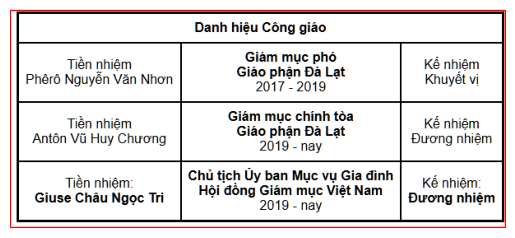


=== Step 2: TableResize ===
Transform: TableResize(min_size=None, long_size=480)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes', 'scale', 'scale_factor', 'keep_ratio']
{
  img_path: F:/data\vitabset\test\143628.png
  sample_idx: 2
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td', ' colspan="3"', '>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    task_type: structure
  }
  ]
  img_info: 
  {
    height: None
    width: None
    split: test
  }
  img: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

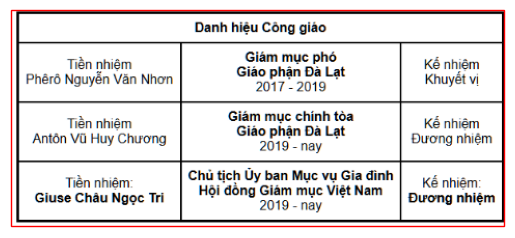


=== Step 3: TablePad ===
Transform: TablePad(size=(480, 480), size_divisor=None, pad_to_square=False, pad_val={'img': 0, 'seg': 255}), padding_mode=constant)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes', 'scale', 'scale_factor', 'keep_ratio']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
{
  img_path: F:/data\vitabset\test\143628.png
  sample_idx: 2
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td', ' colspan="3"', '>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    task_type: structure
  }
  ]
  img_info: 
  {
    height: None
    width: None
    split: test
  }

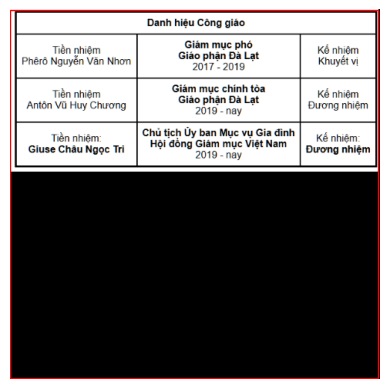


=== Step 4: TableBboxEncode ===
Transform: TableBboxEncode
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'gt_bboxes', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']


KeyError: 'bbox'

In [5]:
sample = structure_dataset[random.randint(0, len(structure_dataset) - 1)].copy()
for i, transform in enumerate(pipeline.transforms):
    print(f"\n=== Step {i+1}: {transform.__class__.__name__} ===")
    print(f"Transform: {transform}")
    print(f"Before: {list(sample.keys())}")
    
    sample = transform(sample)
    
    print(f"After: {list(sample.keys())}")
    print_dict(sample, indent=2)
    
    # Hiển thị thông tin chi tiết
    if 'img' in sample:
        print(f"Image shape: {sample['img'].shape}")
        import matplotlib.pyplot as plt

        plt.imshow(sample['img'])
        import matplotlib.patches as patches
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), sample['img'].shape[1]-2, sample['img'].shape[0]-2, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        plt.axis('off')
        plt.show()
    